In [50]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
bank = pd.read_csv("bank-full.csv",';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
bank.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
bank.shape

(45211, 17)

In [8]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [9]:
bank['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [10]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
bank['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [14]:
bank['balance']=pd.cut(bank['balance'],bins=[-3313,0,10000,20000,30000,40000,50000,58544],labels=[0,1,2,3,4,5,6])
bank['balance']

0        1
1        1
2        1
3        1
4        1
        ..
45206    1
45207    1
45208    1
45209    1
45210    1
Name: balance, Length: 45211, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [15]:
bank['balance'].value_counts()

1    37102
0     7275
2      636
3      141
4       24
5       10
6        8
Name: balance, dtype: int64

In [16]:
bank['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [17]:
bank['duration']=pd.cut(bank['duration'],bins=[1,500,1000,1500,2000,2500,3000,3500],labels=[0,1,2,3,4,5,6])
bank['duration']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    0
45208    2
45209    1
45210    0
Name: duration, Length: 45211, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [18]:
bank['duration'].value_counts()

0    39835
1     4313
2      831
3      168
4       36
6       11
5        9
Name: duration, dtype: int64

In [19]:
bank.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance      15
housing       0
loan          0
contact       0
day           0
month         0
duration      8
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

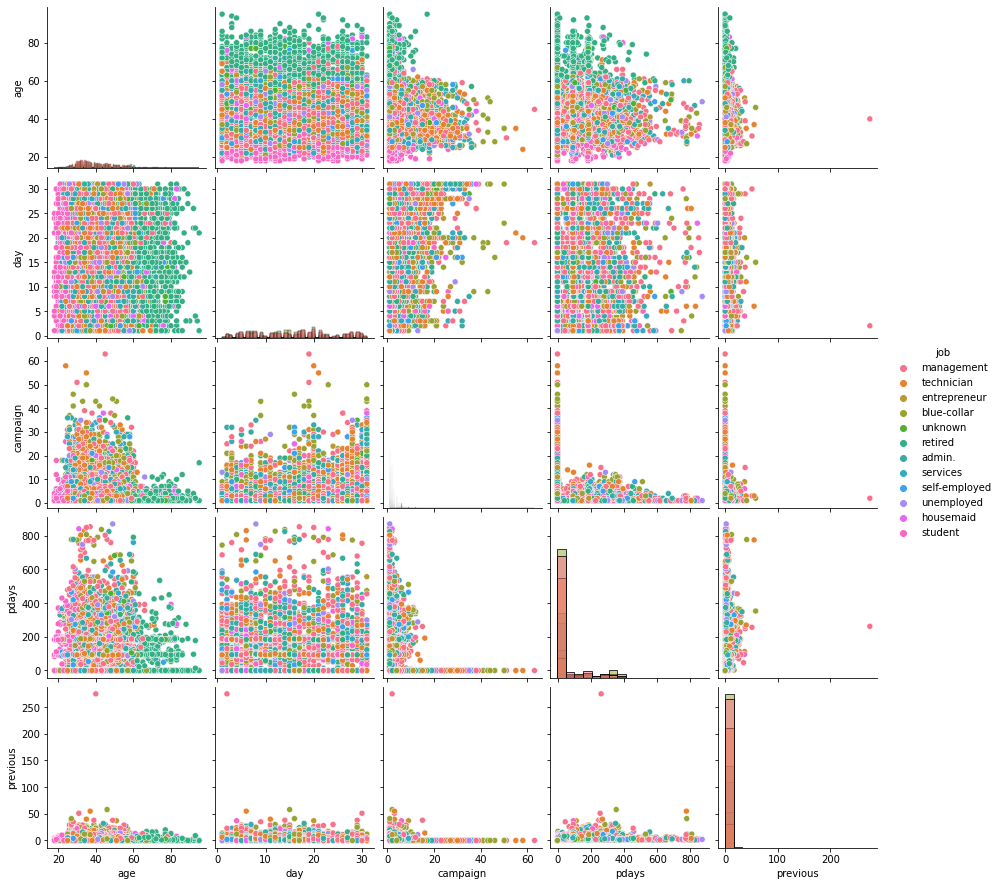

In [52]:
sns.pairplot(data=bank, hue="job", diag_kind="hist")
plt.show()

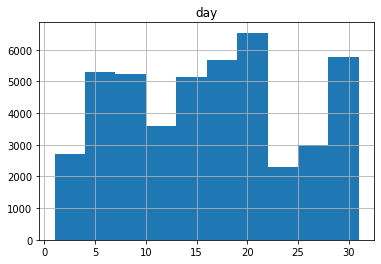

In [56]:
bank.hist('day')
plt.show()

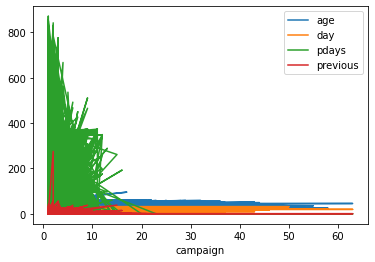

In [57]:
bank.plot('campaign')
plt.show()

In [20]:
bank1 = bank.drop(columns=['campaign','pdays','previous','poutcome','contact'],axis=1)

In [21]:
bank1 = bank.dropna(axis=0)

In [22]:
bank1 = bank[['y','age','job','marital','education','default','balance','housing','loan','day','month','duration']]

In [23]:
bank1

,y,age,job,marital,education,default,balance,housing,loan,day,month,duration
0,no,58,management,married,tertiary,no,1,yes,no,5,may,0
1,no,44,technician,single,secondary,no,1,yes,no,5,may,0
2,no,33,entrepreneur,married,secondary,no,1,yes,yes,5,may,0
3,no,47,blue-collar,married,unknown,no,1,yes,no,5,may,0
4,no,33,unknown,single,unknown,no,1,no,no,5,may,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,technician,married,tertiary,no,1,no,no,17,nov,1
45207,yes,71,retired,divorced,primary,no,1,no,no,17,nov,0
45208,yes,72,retired,married,secondary,no,1,no,no,17,nov,2
45209,no,57,blue-collar,married,secondary,no,1,no,no,17,nov,1


In [24]:
bank2 = pd.get_dummies(bank1,columns=['job','marital','education','default','balance','housing','loan','day','month','duration'])

In [25]:
label_encoder = preprocessing.LabelEncoder()
bank2['y']=label_encoder.fit_transform(bank2['y'])

In [26]:
bank2

,y,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_nov,month_oct,month_sep,duration_0,duration_1,duration_2,duration_3,duration_4,duration_5,duration_6
0,0,58,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,44,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,33,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,47,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,33,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
45207,1,71,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
45208,1,72,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
45209,0,57,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [27]:
X=bank2.iloc[:,1:]
Y=bank2.iloc[:,0]

In [28]:
X

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_nov,month_oct,month_sep,duration_0,duration_1,duration_2,duration_3,duration_4,duration_5,duration_6
0,58,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,47,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
45207,71,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
45208,72,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
45209,57,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [29]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [30]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

BUILDING MODEL 


In [31]:
model = LogisticRegression()
model.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
model.intercept_

array([-0.04976605])

In [33]:
model.coef_

array([[ 0.00229804,  0.17212233, -0.22596067, -0.34676516, -0.40335615,
        -0.01841537,  0.40626712, -0.15041359, -0.01540043,  0.64729216,
        -0.02103591,  0.06994684, -0.15972902, -0.03076125, -0.14393394,
         0.12924733, -0.26313921, -0.00553189,  0.24014902, -0.01692578,
         0.02270545, -0.0681533 , -0.3608371 ,  0.10949263,  0.22829736,
         0.00674884, -0.04678892, -0.00579536,  0.03418041,  0.33024635,
        -0.3756942 ,  0.2171197 , -0.26256756,  0.31836119, -0.06266948,
         0.12831307,  0.20284647, -0.18584601, -0.23826115, -0.21884914,
         0.0427935 , -0.07572684,  0.73906142,  0.10213322,  0.47369048,
         0.6236145 ,  0.19138325,  0.35027449, -0.13226756, -0.70503788,
        -0.10919622, -0.81733516, -0.78716289, -0.31106335,  0.23768426,
         0.25298723,  0.04114972,  0.43809118,  0.09435787,  0.31511793,
        -0.35423827, -0.53517441,  0.20096858, -0.26544785,  0.27161741,
        -0.91597646,  0.92447733, -0.24995002, -0.7

In [34]:
Y_pred=model.predict(X)

In [35]:
Y_pred_bank = pd.DataFrame({"Actaual_Y":Y,"Predicted_Y":Y_pred})

In [36]:
Y_pred_bank

,Actaual_Y,Predicted_Y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0


In [37]:
Confusion_Matrix = confusion_matrix(Y,Y_pred)

In [38]:
Confusion_Matrix

array([[38918,  1004],
       [ 4094,  1195]])

In [39]:
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     39922
           1       0.54      0.23      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.60      0.63     45211
weighted avg       0.86      0.89      0.87     45211



In [60]:
accuracy = accuracy_score(Y,Y_pred)
print("The Accuracy Of The Predicted Model:",accuracy)

The Accuracy Of The Predicted Model: 0.8872398310145762


Text(0, 0.5, 'True Positive Rate')

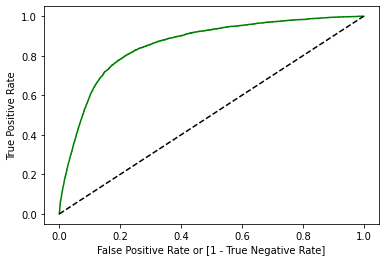

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y, Y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='green', label='logit model ( area  = %0.2f)'%auc,)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [58]:
auc

0.6003957954350557